In [6]:
# import packages
import os
import math
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
import seaborn as sns

In [7]:
# read in all the data
facilities = pd.read_csv('./Data/facilities.csv')
incidents = pd.read_csv('./Data/incidents.csv')
satisfaction = pd.read_csv('./Data/satisfaction.csv')
stations = pd.read_csv('./Data/stations.csv')
stops = pd.read_csv('./Data/stops.csv')
subscriptions = pd.read_csv('./Data/subscriptions.csv')
tickets = pd.read_csv('./Data/tickets.csv')
travelers = pd.read_csv('./Data/travelers.csv', sep=';')

In [8]:
# import all the trips files and store them together in a single dataframe
trips_folder = './Data/Trips/'

for idx, trips_day in enumerate(os.listdir(trips_folder)):
    # get full directory
    dir = trips_folder + trips_day

    # read csv
    df = pd.read_csv(dir, sep=';')

    # add dataframes together
    if idx == 0:
        trips_df = df
    else:
        trips_df = pd.concat([trips_df, df])

# show
trips_df.head()

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
0,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:28:04,06:28:04,06:25:00,06:25:00,184.0,184.0,IC 29: GENT-SINT-PIETERS -> GENK,SCHAARBEEK,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22
1,2025-09-22,3605,IC 29,SNCB/NMBS,36N,06:34:58,06:34:58,06:32:00,06:32:00,178.0,178.0,IC 29: GENT-SINT-PIETERS -> GENK,KORTENBERG,36N,2025-09-22,2025-09-22,2025-09-22,2025-09-22
2,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:41:40,06:43:28,06:39:00,06:42:00,160.0,88.0,IC 29: GENT-SINT-PIETERS -> GENK,LEUVEN,36N,2025-09-22,2025-09-22,2025-09-22,2025-09-22
3,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:50:53,06:50:53,06:49:00,06:49:00,113.0,113.0,IC 29: GENT-SINT-PIETERS -> GENK,VERTRIJK,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22
4,2025-09-22,3605,IC 29,SNCB/NMBS,36,07:02:49,07:02:49,07:00:00,07:00:00,169.0,169.0,IC 29: GENT-SINT-PIETERS -> GENK,EZEMAAL,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22


In [9]:
# Import stations dataset
stations_df = pd.read_csv("./Data/stations.csv")
stations_df.head()

,station_id,name,alternative-fr,alternative-nl,alternative-de,alternative-en,country-code,longitude,latitude,avg_stop_times,official_transfer_time
0,8101003,Wien Hbf,NaN,NaN,NaN,NaN,at,16.375864,48.184923,0.000000,0.0
1,8734201,Arras,NaN,NaN,NaN,NaN,fr,2.781690,50.286830,0.014925,120.0
2,8015345,Aachen Hbf,Aix-la-Chapelle Hbf,Aken Hbf,NaN,NaN,de,6.105275,50.770832,30.268657,300.0
3,8895000,Aalst,Alost,NaN,NaN,NaN,be,4.039653,50.942813,157.425373,300.0
4,8895125,Aalst-Kerrebroek,Alost Kerrebroek,NaN,NaN,NaN,be,4.024407,50.948377,7.731343,300.0


In [24]:
# Check basic information about the dataset (column types, missing values, etc.)
stations_df.info()
# Helps identify which columns are numerical, categorical, or have missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   station_id              675 non-null    int64  
 1   name                    675 non-null    object 
 2   alternative-fr          86 non-null     object 
 3   alternative-nl          74 non-null     object 
 4   alternative-de          25 non-null     object 
 5   alternative-en          33 non-null     object 
 6   country-code            675 non-null    object 
 7   longitude               675 non-null    float64
 8   latitude                675 non-null    float64
 9   avg_stop_times          675 non-null    float64
 10  official_transfer_time  645 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 58.1+ KB


In [25]:
# Display summary statistics for numeric columns
stations_df.describe()
# Gives an overview of distributions (mean, min, max, std) for columns like longitude, latitude, stop times, etc.


,station_id,longitude,latitude,avg_stop_times,official_transfer_time
count,6.750000e+02,675.000000,675.000000,675.000000,645.000000
mean,8.798702e+06,4.692115,50.345985,91.317203,296.186047
std,1.955901e+05,2.058728,2.178827,116.679520,133.294481
min,7.015400e+06,0.123808,6.053335,0.000000,0.000000
25%,8.814171e+06,4.000775,50.434137,33.119403,300.000000
50%,8.843430e+06,4.449489,50.711413,61.746269,300.000000
75%,8.882218e+06,5.261992,50.957330,110.026119,300.000000
max,8.896925e+06,49.921040,52.350000,1040.664179,3540.000000


In [26]:
# Display the first few rows to confirm structure and spot obvious issues
stations_df.head()
# Visually verify that columns were read correctly (e.g., no parsing errors, wrong delimiters, etc.)


,station_id,name,alternative-fr,alternative-nl,alternative-de,alternative-en,country-code,longitude,latitude,avg_stop_times,official_transfer_time
0,8101003,Wien Hbf,NaN,NaN,NaN,NaN,at,16.375864,48.184923,0.000000,0.0
1,8734201,Arras,NaN,NaN,NaN,NaN,fr,2.781690,50.286830,0.014925,120.0
2,8015345,Aachen Hbf,Aix-la-Chapelle Hbf,Aken Hbf,NaN,NaN,de,6.105275,50.770832,30.268657,300.0
3,8895000,Aalst,Alost,NaN,NaN,NaN,be,4.039653,50.942813,157.425373,300.0
4,8895125,Aalst-Kerrebroek,Alost Kerrebroek,NaN,NaN,NaN,be,4.024407,50.948377,7.731343,300.0


In [27]:
# Display the number of rows and columns
stations_df.shape
# Shows dataset size: how many stations and features.

(675, 11)

In [22]:
# Count missing values per column
stations_df.isna().sum()
# Important for understanding data completeness, especially for ‘alternative’ names.



station_id                  0
name                        0
alternative-fr            589
alternative-nl            601
alternative-de            650
alternative-en            642
country-code                0
longitude                   0
latitude                    0
avg_stop_times              0
official_transfer_time     30
dtype: int64

In [23]:
# Check for duplicate station IDs
stations_df['station_id'].duplicated().sum()
# Ensures each station_id is unique; duplicates might indicate data issues.

np.int64(0)

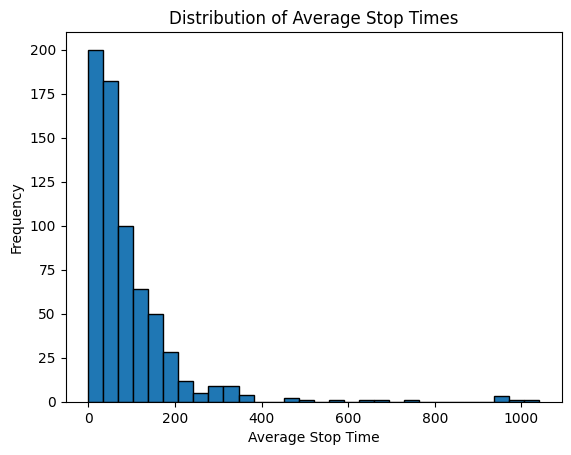

In [28]:
# Plot the distribution of average stop times
stations_df['avg_stop_times'].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribution of Average Stop Times")
plt.xlabel("Average Stop Time")
plt.ylabel("Frequency")
plt.show()
# Helps detect outliers or skewness in stop times (e.g., stations where trains wait unusually long).


In [33]:
# Define a threshold to find unusually high stop times
# Here we pick 400 as an example (you can adjust based on the histogram)
high_stop_stations = stations_df[stations_df['avg_stop_times'] > 400]

# Show the top results sorted by stop time
high_stop_stations.sort_values('avg_stop_times', ascending=False)

,station_id,name,alternative-fr,alternative-nl,alternative-de,alternative-en,country-code,longitude,latitude,avg_stop_times,official_transfer_time
119,8814001,Brussel-Zuid/Bruxelles-Midi,Bruxelles-Midi,Brussel-Zuid,NaN,Brussels-South/Brussels-Midi,be,4.336531,50.835707,1040.664179,300.0
116,8812005,Brussel-Noord/Bruxelles-Nord,Bruxelles-Nord,Brussel-Noord,NaN,Brussels-North,be,4.360846,50.859663,977.910448,300.0
113,8813045,Brussel-Congres/Bruxelles-Congrès,Bruxelles-Congrès,Brussel-Congres,NaN,Brussels-Congres,be,4.362051,50.852067,970.149254,300.0
112,8813003,Brussel-Centraal/Bruxelles-Central,Bruxelles-Central,Brussel-Centraal,NaN,Brussels-Central,be,4.356801,50.845658,970.149254,300.0
114,8813037,Brussel-Kapellekerk/Bruxelles-Chapelle,Bruxelles-Chapelle,Brussel-Kapellekerk,NaN,Brussels-Chapelle/Brussels-Kapellekerk,be,4.347866,50.841127,970.149254,300.0
547,8811007,Schaarbeek/Schaerbeek,Schaerbeek,Schaarbeek,NaN,NaN,be,4.378636,50.878513,737.231343,300.0
26,8821006,Antwerpen-Centraal,Anvers-Central,NaN,NaN,Antwerp-Central,be,4.421101,51.217200,659.716418,300.0
25,8821121,Antwerpen-Berchem,Anvers-Berchem,NaN,NaN,Antwerp-Berchem,be,4.432221,51.199230,645.343284,300.0
248,8892007,Gent-Sint-Pieters,Gand-Saint-Pierre,NaN,NaN,Ghent-Sint-Pieters,be,3.710675,51.035896,576.268657,300.0
368,8833001,Leuven,Louvain,NaN,Löwen,NaN,be,4.715866,50.882280,516.731343,300.0


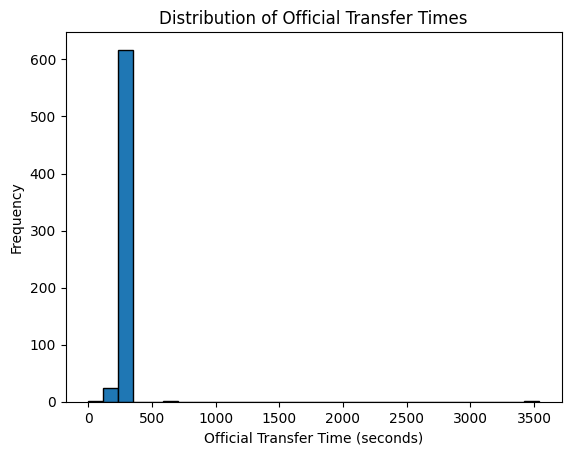

In [29]:
# Plot the distribution of official transfer times
stations_df['official_transfer_time'].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribution of Official Transfer Times")
plt.xlabel("Official Transfer Time (seconds)")
plt.ylabel("Frequency")
plt.show()
# Identifies the range and spread of transfer times across stations.

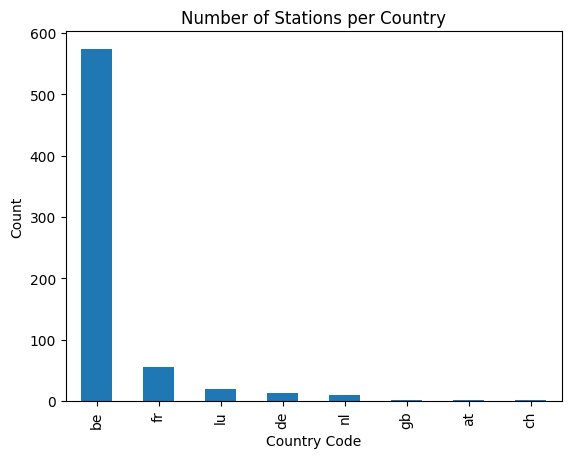

In [30]:
# Count the number of stations per country
stations_df['country-code'].value_counts().plot(kind='bar')
plt.title("Number of Stations per Country")
plt.xlabel("Country Code")
plt.ylabel("Count")
plt.show()
# Useful to see which countries dominate the dataset (e.g., BE, DE, FR, AT).

# Stops

In [10]:
# Import stops dataset
stops_df = pd.read_csv("./Data/stops.csv").drop_duplicates('URI')
stops_df.head()

,URI,parent_stop,longitude,latitude,name,alternative-nl,alternative-fr,alternative-de,alternative-en,platform
0,http://irail.be/stations/NMBS/008821022#3,http://irail.be/stations/NMBS/008821022,4.436395,51.20736,Antwerpen-Oost platform 3,Antwerpen-Oost perron 3,Anvers-Est voie 3,Antwerpen-Oost gleiss 3,Antwerp-East platform 3,3
1,http://irail.be/stations/NMBS/008821022#4,http://irail.be/stations/NMBS/008821022,4.436395,51.20736,Antwerpen-Oost platform 4,Antwerpen-Oost perron 4,Anvers-Est voie 4,Antwerpen-Oost gleiss 4,Antwerp-East platform 4,4
2,http://irail.be/stations/NMBS/008891140#1,http://irail.be/stations/NMBS/008891140,3.447848,51.09230,Aalter platform 1,Aalter perron 1,Aalter voie 1,Aalter gleiss 1,Aalter platform 1,1
3,http://irail.be/stations/NMBS/008891140#2,http://irail.be/stations/NMBS/008891140,3.447848,51.09230,Aalter platform 2,Aalter perron 2,Aalter voie 2,Aalter gleiss 2,Aalter platform 2,2
4,http://irail.be/stations/NMBS/008891140#3,http://irail.be/stations/NMBS/008891140,3.447848,51.09230,Aalter platform 3,Aalter perron 3,Aalter voie 3,Aalter gleiss 3,Aalter platform 3,3


In [11]:
def extract_station_id_from_parent_stop(text):
    return text.split('/')[-1]

# Apply function on each row
stops_df['station_id'] = stops_df['parent_stop'].apply(lambda x: extract_station_id_from_parent_stop(x)) 

In [12]:
def extract_station_id_from_URI(text):
    return text.split('/')[-1].split('#')[0]

# Apply function on each row
stops_df['station_id2'] = stops_df['URI'].apply(lambda x: extract_station_id_from_URI(x)) 

In [13]:
# Show result
stops_df[['station_id', 'station_id2', 'URI', 'parent_stop', ]].head()

,station_id,station_id2,URI,parent_stop
0,008821022,008821022,http://irail.be/stations/NMBS/008821022#3,http://irail.be/stations/NMBS/008821022
1,008821022,008821022,http://irail.be/stations/NMBS/008821022#4,http://irail.be/stations/NMBS/008821022
2,008891140,008891140,http://irail.be/stations/NMBS/008891140#1,http://irail.be/stations/NMBS/008891140
3,008891140,008891140,http://irail.be/stations/NMBS/008891140#2,http://irail.be/stations/NMBS/008891140
4,008891140,008891140,http://irail.be/stations/NMBS/008891140#3,http://irail.be/stations/NMBS/008891140


In [14]:
# Count the number platforms for each station
platform_count_df = stops_df.groupby('station_id').size().reset_index()

# Rename columns
platform_count_df.columns = ['station_id', 'platforms']

# Order based on count
platform_count_df = platform_count_df.sort_values('platforms', ascending=False)

# Show
platform_count_df

,station_id,platforms
62,008814001,21
90,008821006,14
177,008833001,13
1,008811007,13
125,008822004,12
...,...,...
496,008893815,1
511,008895125,1
520,008895463,1
521,008895471,1


In [15]:
# Convert station_id from string type to integer type
platform_count_df['station_id'] = platform_count_df['station_id'].astype(int)

In [16]:
# Merge result with stations_df's station_id to retrieve the names of the station
platform_count_df = platform_count_df.merge(stations_df[['station_id', 'name']], how='left', on='station_id')
platform_count_df

,station_id,platforms,name
0,8814001,21,Brussel-Zuid/Bruxelles-Midi
1,8821006,14,Antwerpen-Centraal
2,8833001,13,Leuven
3,8811007,13,Schaarbeek/Schaerbeek
4,8822004,12,Mechelen
...,...,...,...
551,8893815,1,Waarschoot
552,8895125,1,Aalst-Kerrebroek
553,8895463,1,Bambrugge
554,8895471,1,Erpe-Mere


In [17]:
# Check for missing values
platform_count_df.isnull().sum()

station_id    0
platforms     0
name          0
dtype: int64

# Facilities

In [34]:
# Import facilities
facilities = pd.read_csv("./Data/facilities.csv")

# Show
facilities.head()

,station_id,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_open_wednesday,sales_close_wednesday,sales_open_thursday,sales_close_thursday,sales_open_friday,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday
0,8734201,Arras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8015345,Aachen Hbf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8895000,Aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,05:45,20:00,05:45,20:00,05:45,20:00,06:00,20:00,06:00,20:00
3,8895125,Aalst-Kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8891140,Aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,07:00,14:15,07:00,14:15,07:00,14:15,07:45,15:00,07:45,15:00


In [35]:
# Check number of missing values per variable
for col in facilities.columns:
    missings = len(facilities[col][facilities[col].isnull()]) / float(len(facilities))
    print(col, missings)

station_id 0.0
name 0.0
street 0.17210682492581603
zip 0.17359050445103857
city 0.17359050445103857
ticket_vending_machine 0.16765578635014836
luggage_lockers 0.16765578635014836
free_parking 0.16765578635014836
taxi 0.16765578635014836
bicycle_spots 0.16765578635014836
blue-bike 0.16765578635014836
bus 0.16765578635014836
tram 0.16765578635014836
metro 0.16765578635014836
wheelchair_available 0.16765578635014836
ramp 0.16765578635014836
disabled_parking_spots 0.16765578635014836
elevated_platform 0.16765578635014836
escalator_up 0.16765578635014836
escalator_down 0.16765578635014836
elevator_platform 0.16765578635014836
audio_induction_loop 0.16765578635014836
sales_open_monday 0.7997032640949555
sales_close_monday 0.7997032640949555
sales_open_tuesday 0.7997032640949555
sales_close_tuesday 0.7997032640949555
sales_open_wednesday 0.7997032640949555
sales_close_wednesday 0.7997032640949555
sales_open_thursday 0.7997032640949555
sales_close_thursday 0.7997032640949555
sales_open_friday 

In [36]:
# Check data type of columns
facilities.dtypes

station_id                  int64
name                       object
street                     object
zip                        object
city                       object
ticket_vending_machine    float64
luggage_lockers           float64
free_parking              float64
taxi                      float64
bicycle_spots             float64
blue-bike                 float64
bus                       float64
tram                      float64
metro                     float64
wheelchair_available      float64
ramp                      float64
disabled_parking_spots    float64
elevated_platform         float64
escalator_up              float64
escalator_down            float64
elevator_platform         float64
audio_induction_loop      float64
sales_open_monday          object
sales_close_monday         object
sales_open_tuesday         object
sales_close_tuesday        object
sales_open_wednesday       object
sales_close_wednesday      object
sales_open_thursday        object
sales_close_th

# Merge

In [37]:
print(stations.columns)
print(facilities.columns)

Index(['station_id', 'name', 'alternative-fr', 'alternative-nl',
       'alternative-de', 'alternative-en', 'country-code', 'longitude',
       'latitude', 'avg_stop_times', 'official_transfer_time'],
      dtype='object')
Index(['station_id', 'name', 'street', 'zip', 'city', 'ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop',
       'sales_open_monday', 'sales_close_monday', 'sales_open_tuesday',
       'sales_close_tuesday', 'sales_open_wednesday', 'sales_close_wednesday',
       'sales_open_thursday', 'sales_close_thursday', 'sales_open_friday',
       'sales_close_friday', 'sales_open_saturday', 'sales_close_saturday',
       'sales_open_sunday', 'sales_close_sunday'],
      dtype='object')


In [ ]:
# Merge on 'station_id'
merged_df = pd.merge(
    stations, 
    facilities, 
    on='station_id',       # key column
    how='left',            # keep all stations even if facilities missing
    suffixes=('_station', '_facility')  # avoid duplicate 'name' column
)

# Optional: if you want to drop the duplicate 'name_facility' column
merged_df = merged_df.drop(columns=['name_facility'])

print(merged_df.head())


   station_id      name_station       alternative-fr alternative-nl  \
0     8101003          Wien Hbf                  NaN            NaN   
1     8734201             Arras                  NaN            NaN   
2     8015345        Aachen Hbf  Aix-la-Chapelle Hbf       Aken Hbf   
3     8895000             Aalst                Alost            NaN   
4     8895125  Aalst-Kerrebroek     Alost Kerrebroek            NaN   

  alternative-de alternative-en country-code  longitude   latitude  \
0            NaN            NaN           at  16.375864  48.184923   
1            NaN            NaN           fr   2.781690  50.286830   
2            NaN            NaN           de   6.105275  50.770832   
3            NaN            NaN           be   4.039653  50.942813   
4            NaN            NaN           be   4.024407  50.948377   

   avg_stop_times  ...  sales_open_wednesday sales_close_wednesday  \
0        0.000000  ...                   NaN                   NaN   
1        0.0

In [40]:
# Get top 10 stations by disabled parking spots
top_disabled_parking = merged_df[['station_id', 'name_station', 'disabled_parking_spots']] \
                        .sort_values(by='disabled_parking_spots', ascending=False) \
                        .head(10)

print(top_disabled_parking)


     station_id        name_station  disabled_parking_spots
26      8821006  Antwerpen-Centraal                    24.0
387     8841004    Liège-Guillemins                    13.0
37      8866001               Arlon                    13.0
618     8844008    Verviers-Central                    12.0
343     8896008            Kortrijk                    10.0
243     8861200            Gembloux                    10.0
573     8894508        Sint-Niklaas                     9.0
427     8822004            Mechelen                     8.0
165     8893401         Dendermonde                     8.0
105     8814258     Braine-l'Alleud                     7.0


In [43]:
# List of facility columns you want to check
facilities_list = [
    'ticket_vending_machine', 'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
             'bus', 'tram', 'metro', 'wheelchair_available', 'ramp', 'disabled_parking_spots', 'elevated_platform', 
             'escalator_up', 'escalator_down', 'elevator_platform', 'audio_induction_loop'
]

# Loop over each facility and print top 10
for facility in facilities_list:
    print(f"\nTop 10 stations for {facility}:\n")
    top_10 = merged_df[['station_id', 'name_station', facility]] \
                .sort_values(by=facility, ascending=False) \
                .head(10)
    print(top_10.to_string(index=False))





Top 10 stations for ticket_vending_machine:

 station_id name_station  ticket_vending_machine
    8883212  Écaussinnes                     1.0
    8895000        Aalst                     1.0
    8894821  Zwijndrecht                     1.0
    8891140       Aalter                     1.0
    8833209     Aarschot                     1.0
    8892288      Aarsele                     1.0
    8886546        Acren                     1.0
    8874583       Aiseau                     1.0
    8831039        Alken                     1.0
    8895208     Zottegem                     1.0

Top 10 stations for luggage_lockers:

 station_id                           name_station  luggage_lockers
    8891405                           Blankenberge              1.0
    8814001            Brussel-Zuid/Bruxelles-Midi              1.0
    8892007                      Gent-Sint-Pieters              1.0
    8811304 Brussel-Luxemburg/Bruxelles-Luxembourg              1.0
    8812005           Brussel-Noord/

In [44]:
# Stations without free parking
no_free_parking = merged_df[merged_df['free_parking'] == 0][['station_id', 'name_station', 'free_parking']]

print("Stations without free parking:")
print(no_free_parking.to_string(index=False))


Stations without free parking:
 station_id                           name_station  free_parking
    8892288                                Aarsele           0.0
    8886546                                  Acren           0.0
    8874583                                 Aiseau           0.0
    8821030                          Antwerpen-Dam           0.0
    8821063                     Antwerpen-Luchtbal           0.0
    8821089                Antwerpen-Noorderdokken           0.0
    8821022                         Antwerpen-Oost           0.0
    8821196                         Antwerpen-Zuid           0.0
    8892734                                Anzegem           0.0
    8814472                        Arcaden/Arcades           0.0
    8886009                                    Ath           0.0
    8866605                                  Athus           0.0
    8866654                                Aubange           0.0
    8895463                              Bambrugge         

In [45]:
# Count stations with and without free parking
parking_counts = merged_df['free_parking'].value_counts()

print("Number of stations with and without free parking:")
print(parking_counts)


Number of stations with and without free parking:
free_parking
1.0    391
0.0    170
Name: count, dtype: int64


In [46]:
# Count of stations with and without free parking per city
parking_by_city = merged_df.groupby('city')['free_parking'].value_counts().unstack(fill_value=0)
print(parking_by_city)


free_parking    0.0  1.0
city                    
Aalst             0    2
Aalter            0    1
Aarschot          0    2
Aarsele           1    0
Aiseau-Presles    1    0
...             ...  ...
Zingem            0    1
Zonhoven          0    1
Zottegem          0    1
Zwalm             1    0
Zwijndrecht       0    1

[454 rows x 2 columns]


In [48]:
# Total stations with free parking per city
free_parking_by_city = merged_df.groupby('city')['free_parking'].sum()

# Sort descending to find the city with most free parking
free_parking_by_city = free_parking_by_city.sort_values(ascending=False)

print("Cities with most stations having free parking:")
print(free_parking_by_city.head(25))


Cities with most stations having free parking:
city
Gent                   3.0
Brussel                3.0
Court-Saint-Etienne    3.0
Esneux                 3.0
Grez Doiceau           3.0
Mortsel                3.0
Chastre                2.0
Essen                  2.0
Gentbrugge             2.0
Veurne                 2.0
Jambes                 2.0
Seilles                2.0
Haaltert               2.0
Erquelinnes            2.0
Beringen               2.0
Berlaar                2.0
Aalst                  2.0
Ternat                 2.0
Aarschot               2.0
Theux                  2.0
Grobbendonk            2.0
Charleroi              2.0
Hasselt                2.0
Liege                  2.0
Huy                    2.0
Name: free_parking, dtype: float64


In [49]:
# Complete mapping of Belgian ZIP codes to provinces
zip_to_region = {
    range(1000, 1300): 'Brussels',
    range(1300, 1400): 'Brabant Wallon',
    range(4000, 4700): 'Liège',
    range(5000, 5600): 'Namur',
    range(6000, 6600): 'Hainaut',
    range(7000, 7700): 'Hainaut',  # Mons region also in Hainaut
    range(8000, 9000): 'West-Vlaanderen',
    range(9000, 9500): 'Oost-Vlaanderen',
    range(3000, 3500): 'Vlaams-Brabant',
    range(2000, 3000): 'Antwerpen',
    range(9700, 9800): 'Limburg'
}

# Function to map zip code to region
def get_region(zip_code):
    try:
        zip_code = int(zip_code)
        for zip_range, region in zip_to_region.items():
            if zip_code in zip_range:
                return region
        return 'Other'
    except:
        return 'Unknown'

# Add a 'region' column
merged_df['region'] = merged_df['zip'].apply(get_region)

# Count stations with free parking per region
parking_by_region = merged_df.groupby('region')['free_parking'].sum().sort_values(ascending=False)

print("Number of stations with free parking per Belgian province:")
print(parking_by_region)


Number of stations with free parking per Belgian province:
region
Other              122.0
Antwerpen           48.0
Hainaut             45.0
Oost-Vlaanderen     37.0
Namur               36.0
Liège               27.0
West-Vlaanderen     27.0
Vlaams-Brabant      26.0
Brabant Wallon      11.0
Brussels             8.0
Limburg              2.0
Unknown              2.0
Name: free_parking, dtype: float64


In [52]:
# Correlation between free parking and other facilities
facilities_cols = [
  'ticket_vending_machine', 'luggage_lockers', 'taxi', 'bicycle_spots', 'blue-bike',
             'bus', 'tram', 'metro', 'wheelchair_available', 'ramp', 'disabled_parking_spots', 'elevated_platform', 
             'escalator_up', 'escalator_down', 'elevator_platform', 'audio_induction_loop'
]

corr = merged_df[['free_parking'] + facilities_cols].corr()
print(corr['free_parking'])


free_parking              1.000000
ticket_vending_machine    0.180996
luggage_lockers           0.076033
taxi                      0.120226
bicycle_spots             0.332619
blue-bike                 0.149034
bus                       0.224277
tram                     -0.061216
metro                    -0.102576
wheelchair_available      0.112706
ramp                      0.198043
disabled_parking_spots    0.268968
elevated_platform        -0.003665
escalator_up              0.006322
escalator_down           -0.006856
elevator_platform         0.008636
audio_induction_loop      0.230359
Name: free_parking, dtype: float64


In [54]:
# Count stations with wheelchair access per Belgian province
wheelchair_by_region = merged_df.groupby('region')['wheelchair_available'].sum().sort_values(ascending=False)

print("Number of stations with wheelchair access per Belgian province:")
print(wheelchair_by_region)


Number of stations with wheelchair access per Belgian province:
region
Other              9.0
West-Vlaanderen    5.0
Antwerpen          4.0
Brussels           4.0
Oost-Vlaanderen    4.0
Vlaams-Brabant     4.0
Namur              3.0
Hainaut            2.0
Brabant Wallon     1.0
Liège              1.0
Limburg            0.0
Unknown            0.0
Name: wheelchair_available, dtype: float64


In [56]:
# Correlation of wheelchair availability with other facilities
facilities_cols = [
    'ticket_vending_machine', 'luggage_lockers', 'taxi', 'bicycle_spots', 'blue-bike',
             'bus', 'tram', 'metro', 'ramp', 'disabled_parking_spots', 'elevated_platform', 
             'escalator_up', 'escalator_down', 'elevator_platform', 'audio_induction_loop'
]

corr_wheelchair = merged_df[['wheelchair_available'] + facilities_cols].corr()
print("Correlation with wheelchair availability:")
print(corr_wheelchair['wheelchair_available'])


Correlation with wheelchair availability:
wheelchair_available      1.000000
ticket_vending_machine    0.105189
luggage_lockers           0.522162
taxi                      0.617021
bicycle_spots             0.335284
blue-bike                 0.477406
bus                       0.245202
tram                      0.155761
metro                     0.169615
ramp                      0.526183
disabled_parking_spots    0.414687
elevated_platform         0.202295
escalator_up              0.477250
escalator_down            0.321467
elevator_platform         0.532740
audio_induction_loop      0.434041
Name: wheelchair_available, dtype: float64


In [68]:
# Complete mapping of Belgian ZIP codes to provinces
zip_to_region = {
    range(1000, 1300): 'Brussels',
    range(1300, 1400): 'Brabant Wallon',
    range(4000, 4700): 'Liège',
    range(5000, 5600): 'Namur',
    range(6000, 6600): 'Hainaut',
    range(7000, 7700): 'Hainaut',  # Mons region also in Hainaut
    range(8000, 9000): 'West-Vlaanderen',
    range(9000, 9500): 'Oost-Vlaanderen',
    range(3000, 3500): 'Vlaams-Brabant',
    range(2000, 3000): 'Antwerpen',
    range(9700, 9800): 'Limburg'
}

# Function to map zip code to region
def get_region(zip_code):
    try:
        zip_code = int(zip_code)
        for zip_range, region in zip_to_region.items():
            if zip_code in zip_range:
                return region
        return 'Other'
    except:
        return 'Unknown'

# Add a 'region' column
merged_df['region'] = merged_df['zip'].apply(get_region)

# List of facility columns
facility_cols = ['ticket_vending_machine', 'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots',
                 'blue-bike', 'bus', 'tram', 'metro', 'wheelchair_available', 'ramp', 
                 'disabled_parking_spots', 'elevated_platform', 'escalator_up', 'escalator_down',
                 'elevator_platform', 'audio_induction_loop']

# Sum each facility per region
facilities_by_region = merged_df.groupby('region')[facility_cols].sum().sort_index()

print("Number of stations with each facility per Belgian province:")
print(facilities_by_region)


Number of stations with each facility per Belgian province:
                 ticket_vending_machine  luggage_lockers  free_parking  taxi  \
region                                                                         
Antwerpen                          48.0              2.0          48.0   6.0   
Brabant Wallon                     13.0              0.0          11.0   1.0   
Brussels                           30.0              4.0           8.0   5.0   
Hainaut                            66.0              2.0          45.0   6.0   
Limburg                             2.0              0.0           2.0   0.0   
Liège                              32.0              1.0          27.0   2.0   
Namur                              39.0              2.0          36.0   5.0   
Oost-Vlaanderen                    41.0              2.0          37.0   4.0   
Other                             155.0              0.0         122.0   8.0   
Unknown                             2.0              0.0    

In [59]:
# Now merge platform counts and station names into the same DataFrame
merged_df = merged_df.merge(
    platform_count_df[['station_id', 'name', 'platforms']],
    how='left',
    on='station_id'
)

print(merged_df.head())


   station_id      name_station       alternative-fr alternative-nl  \
0     8101003          Wien Hbf                  NaN            NaN   
1     8734201             Arras                  NaN            NaN   
2     8015345        Aachen Hbf  Aix-la-Chapelle Hbf       Aken Hbf   
3     8895000             Aalst                Alost            NaN   
4     8895125  Aalst-Kerrebroek     Alost Kerrebroek            NaN   

  alternative-de alternative-en country-code  longitude   latitude  \
0            NaN            NaN           at  16.375864  48.184923   
1            NaN            NaN           fr   2.781690  50.286830   
2            NaN            NaN           de   6.105275  50.770832   
3            NaN            NaN           be   4.039653  50.942813   
4            NaN            NaN           be   4.024407  50.948377   

   avg_stop_times  ...  sales_close_thursday sales_open_friday  \
0        0.000000  ...                   NaN               NaN   
1        0.014925  .

In [ ]:
corr = merged_df[['platforms', 'ticket_vending_machine', 'luggage_lockers', 'free_parking', 
                  'taxi', 'bicycle_spots', 'blue-bike', 'bus', 'tram', 'metro', 
                  'wheelchair_available', 'ramp', 'disabled_parking_spots', 
                  'elevated_platform', 'escalator_up', 'escalator_down', 
                  'elevator_platform', 'audio_induction_loop']].corr()

print(corr['platforms'].sort_values(ascending=False))  




platforms                 1.000000
wheelchair_available      0.642939
luggage_lockers           0.609980
taxi                      0.582896
audio_induction_loop      0.519690
escalator_up              0.518603
ramp                      0.515853
blue-bike                 0.514059
elevator_platform         0.479591
disabled_parking_spots    0.458590
bicycle_spots             0.421928
escalator_down            0.377875
bus                       0.327572
elevated_platform         0.288154
tram                      0.260442
metro                     0.256117
free_parking              0.200763
ticket_vending_machine    0.149696
Name: platforms, dtype: float64


In [73]:
# test

In [63]:
import pandas as pd
import numpy as np

# lijst van faciliteiten
facilities = ['ticket_vending_machine', 'luggage_lockers', 'free_parking', 
              'taxi', 'bicycle_spots', 'blue-bike', 'bus', 'tram', 'metro', 
              'wheelchair_available', 'ramp', 'disabled_parking_spots', 
              'elevated_platform', 'escalator_up', 'escalator_down', 
              'elevator_platform', 'audio_induction_loop']

# drempel voor top outliers, bv top 5% per faciliteit
top_percentile = 0.95

# lege lijst om resultaten te bewaren
outlier_stations = []

for facility in facilities:
    # sla NaN waarden over
    df_valid = merged_df[['station_id', 'name_station', 'platforms', facility]].dropna()
    
    if df_valid.empty:
        continue
    
    # bepaal top stations voor deze faciliteit
    threshold = df_valid[facility].quantile(top_percentile)
    top_stations = df_valid[df_valid[facility] >= threshold]
    
    # binnen top stations, kijk welke stations relatief weinig platforms hebben
    platform_median_top = top_stations['platforms'].median()
    low_platforms = top_stations[top_stations['platforms'] < platform_median_top]
    
    # voeg toe aan lijst
    for _, row in low_platforms.iterrows():
        outlier_stations.append({
            'station_id': row['station_id'],
            'name_station': row['name_station'],
            'facility': facility,
            'facility_value': row[facility],
            'platforms': row['platforms'],
            'top_threshold': threshold,
            'median_platforms_top': platform_median_top
        })

# zet om naar dataframe
outliers_df = pd.DataFrame(outlier_stations)

# sorteer eventueel per faciliteit en platformen
outliers_df = outliers_df.sort_values(['facility', 'platforms'])
print(outliers_df)


     station_id                            name_station              facility  \
469     8844404                                     Spa  audio_induction_loop   
419     8863404                                 Andenne  audio_induction_loop   
421     8894748                                 Beveren  audio_induction_loop   
425     8892452                               Diksmuide  audio_induction_loop   
427     8893708                                   Eeklo  audio_induction_loop   
..          ...                                     ...                   ...   
282     8844008                        Verviers-Central  wheelchair_available   
266     8866001                                   Arlon  wheelchair_available   
267     8813003      Brussel-Centraal/Bruxelles-Central  wheelchair_available   
268     8811304  Brussel-Luxemburg/Bruxelles-Luxembourg  wheelchair_available   
277     8865003                               Libramont  wheelchair_available   

     facility_value  platfo

In [65]:
# lijst van faciliteiten
facilities = ['ticket_vending_machine', 'luggage_lockers', 'free_parking', 
              'taxi', 'bicycle_spots', 'blue-bike', 'bus', 'tram', 'metro', 
              'wheelchair_available', 'ramp', 'disabled_parking_spots', 
              'elevated_platform', 'escalator_up', 'escalator_down', 
              'elevator_platform', 'audio_induction_loop']

# bepaal hoeveel topstations je wilt tonen per faciliteit
top_n = 15

# dictionary om resultaten in te bewaren
top_stations_dict = {}

for facility in facilities:
    # selecteer relevante kolommen en drop NaN
    df_valid = merged_df[['station_id', 'name_station', 'platforms', facility]].dropna()
    
    if df_valid.empty:
        continue
    
    # selecteer top N stations voor de faciliteit
    top_stations = df_valid.nlargest(top_n, facility)
    
    # rangschik deze top N op aantal platforms van laag naar hoog
    top_stations_sorted = top_stations.sort_values('platforms')
    
    # sla op in dictionary
    top_stations_dict[facility] = top_stations_sorted

# toon resultaten
for facility, df in top_stations_dict.items():
    print(f"Top stations voor {facility} (gerangschikt op platforms):")
    print(df)
    print("\n")


Top stations voor ticket_vending_machine (gerangschikt op platforms):
    station_id        name_station  platforms  ticket_vending_machine
7      8892288             Aarsele        2.0                     1.0
14     8831039               Alken        2.0                     1.0
11     8874583              Aiseau        2.0                     1.0
8      8886546               Acren        2.0                     1.0
18     8863404             Andenne        2.0                     1.0
24     8885522             Antoing        2.0                     1.0
22     8863818           Anseremme        2.0                     1.0
5      8891140              Aalter        4.0                     1.0
19     8842002             Angleur        4.0                     1.0
29     8821063  Antwerpen-Luchtbal        4.0                     1.0
21     8841202                 Ans        5.0                     1.0
6      8833209            Aarschot        5.0                     1.0
3      8895000      

In [70]:
# lijst van faciliteiten
facilities = ['ticket_vending_machine', 'luggage_lockers', 'free_parking', 
              'taxi', 'bicycle_spots', 'blue-bike', 'bus', 'tram', 'metro', 
              'wheelchair_available', 'ramp', 'disabled_parking_spots', 
              'elevated_platform', 'escalator_up', 'escalator_down', 
              'elevator_platform', 'audio_induction_loop']

# bepaal hoeveel topstations je wilt tonen per faciliteit
top_n = 15

# dictionary om resultaten in te bewaren
top_stations_dict = {}

for facility in facilities:
    # selecteer relevante kolommen en drop NaN
    df_valid = merged_df[['station_id', 'name_station', 'platforms', facility]].dropna()
    
    if df_valid.empty:
        continue
    
    # selecteer top N stations voor de faciliteit
    top_stations = df_valid.nlargest(top_n, facility)
    
    # rangschik deze top N op aantal platforms van hoog naar laag
    top_stations_sorted = top_stations.sort_values('platforms', ascending=False)
    
    # sla op in dictionary
    top_stations_dict[facility] = top_stations_sorted

# toon resultaten
for facility, df in top_stations_dict.items():
    print(f"Top stations voor {facility} (gerangschikt op platforms):")
    print(df)
    print("\n")


Top stations voor ticket_vending_machine (gerangschikt op platforms):
    station_id        name_station  platforms  ticket_vending_machine
26     8821006  Antwerpen-Centraal       14.0                     1.0
25     8821121   Antwerpen-Berchem        9.0                     1.0
3      8895000               Aalst        7.0                     1.0
6      8833209            Aarschot        5.0                     1.0
21     8841202                 Ans        5.0                     1.0
19     8842002             Angleur        4.0                     1.0
5      8891140              Aalter        4.0                     1.0
29     8821063  Antwerpen-Luchtbal        4.0                     1.0
11     8874583              Aiseau        2.0                     1.0
8      8886546               Acren        2.0                     1.0
7      8892288             Aarsele        2.0                     1.0
14     8831039               Alken        2.0                     1.0
18     8863404      

In [72]:
# Filter op West-Vlaanderen en gratis parking
west_vlaanderen_parking = merged_df[
    (merged_df['region'] == 'West-Vlaanderen') & 
    (merged_df['free_parking'] > 0)  # >0 om alleen stations met gratis parking te selecteren
]

# Toon relevante kolommen
print(west_vlaanderen_parking[['station_id', 'name_station', 'free_parking']])


     station_id  name_station  free_parking
65      8891124       Beernem           1.0
84      8896388      Bissegem           1.0
86      8891405  Blankenberge           1.0
110     8891009        Brugge           1.0
159     8892338      De Panne           1.0
170     8892452     Diksmuide           1.0
182     8891652    Duinbergen           1.0
278     8896115     Harelbeke           1.0
287     8891645         Heist           1.0
318     8896503         Ieper           1.0
319     8896925  Ingelmunster           1.0
338     8891660        Knokke           1.0
339     8892320      Koksijde           1.0
341     8892403     Kortemark           1.0
343     8896008      Kortrijk           1.0
373     8892205  Lichtervelde           1.0
385     8891629     Lissewege           1.0
491     8891702      Oostende           1.0
492     8891116      Oostkamp           1.0
514     8896735     Poperinge           1.0
532     8896800     Roeselare           1.0
604     8891314       Torhout   